#### Decision Trees

Objectives

Develop a classification model using Decision Tree Algorithm

Using machine learning algorithm, Decision Trees, here this classification algorithm to build a model from the historical data of patients, and their response to different medications. 

Then using the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

In [28]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import tree
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('drug.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


##### Data Pre Processing 

 Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the LabelEncoder() method to convert the categorical variable into dummy/indicator variables.

In [30]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [31]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [32]:
# target variable

y= df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### Setting up the Decision Tree 

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
# Modeling

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Setting some predictions on the testset





In [36]:
predTree = drugTree.predict(X_test)
predTree

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugB', 'drugX', 'drugY',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugB'], dtype=object)

In [37]:
print (predTree [0:5])
print (y_test [0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugX']
126    drugY
104    drugY
99     drugY
92     drugY
111    drugX
Name: Drug, dtype: object


To check the accuracy of the model

In [38]:
from sklearn import metrics
# import matplotlib.pyplot as plt
# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTree's Accuray Score:", metrics.accuracy_score(y_test, predTree))

DecisionTree's Accuray Score: 1.0


In [39]:
# from sklearn.tree import export_graphviz
# export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
# !dot -Tpng tree.dot -o tree.png


### Visualization 

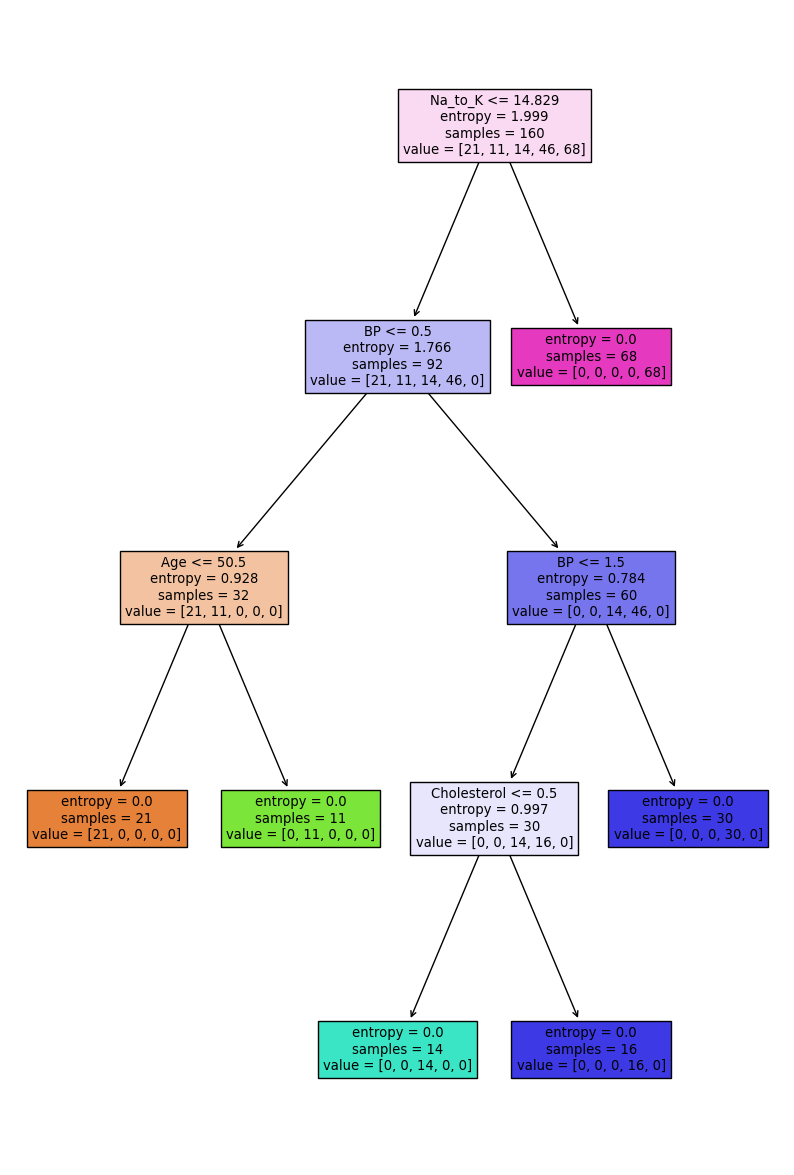

In [41]:


plt.figure(figsize=(10,15))
tree.plot_tree(drugTree, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], filled=True)
plt.show()